In [54]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import itertools
from math import pi
import time
import matplotlib.pyplot as plt

In [55]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks()

This notebook details the tools relevant to continuation, namely ```dimension_continuation``` and ```discretization_continuation```.

In [56]:
s = read_h5('C:/Users/Matt/Desktop/gudorf/KS/python/data_and_figures/tiles/streak/final_tile/EquilibriumOrbitKS_L6p39.h5', directory='', basis='field')
w = read_h5('C:/Users/Matt/Desktop/gudorf/KS/python/data_and_figures/tiles/gap/final_tile/AntisymmetricOrbitKS_T17p150_L17p591.h5', directory='', basis='field')
m = read_h5('C:/Users/Matt/Desktop/gudorf/KS/python/data_and_figures/tiles/defects/defect1/final_tile/RelativeOrbitKS_T15p855_L13p026.h5', directory='', basis='field')

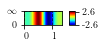

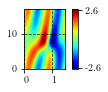

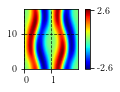

In [57]:
m = read_h5('RelativeOrbitKS_T15p855_L13p026.h5', directory='../data/tiles/original/').reshape(64, 64)
shift = m.S
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padded=False, comoving=True)
td[0].plot()
td[1].plot()
td[2].plot()

In [42]:
symbol_array = np.array([[0,1]])
tiling= tile(symbol_array, td, RelativeOrbitKS).convert(to='modes')


In [60]:
m = read_h5('RelativeOrbitKS_T15p855_L13p026.h5', directory='../data/tiles/original/').reshape(64, 64)
continuation_result = dimension_continuation(m, 13.1, axis=1, step_size=0.01, method='hybrid', 
                                             verbose=True, save=True, preconditioning=False,
                                             directory='../data/local/continuation/defect/')


-------------------------------------------------------------------------------------------------
Starting gradient descent
Initial residual : 0.38316052509761567
Target residual tolerance : 4.096e-06
Maximum iteration number : 32768
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["15.8559", "13.027", "-3.3437"], "field_shape": ["64", "64"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 0.207690944801533
Target residual tolerance : 4.096e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["15.8559", "13.027", "-3.3437"], "field_shape": ["64", "64"]})
-------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

In [50]:
orbit_01.orbit.L

25.19349536206205

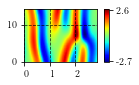

In [49]:
orbit_01.orbit.plot()

In [30]:
symmetry_breaking_continuation = convert_class(wbig.orbit, RelativeOrbitKS)

In [33]:
symmetry_breaking_continuation.L

17.591042545348753

In [34]:
symmetry_breaking_continuation.S = symmetry_breaking_continuation.L/2

In [35]:
symmetry_breaking_continuation.S

8.795521272674376

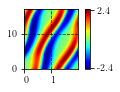

In [37]:
symmetry_breaking_continuation.plot()

In [40]:
continuation_result = dimension_continuation(symmetry_breaking_continuation, td[1].L + s.L, axis=1, step_size=0.01, method='hybrid', 
                                             verbose=True, save=True, 
                                             directory='../data/local/continuation/symmetry_breaking/')


-------------------------------------------------------------------------------------------------
Starting gradient descent
Initial residual : 81.52747791371625
Target residual tolerance : 1.024e-06
Maximum iteration number : 16384
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["17.1508", "17.591", "8.7955"], "field_shape": ["32", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=0.0225465 after 5000 gradient descent steps. Parameters:(17.326604196122187, 17.591132321197037, 0.31799182229099704)
#################################################
 Residual=0.0091319 after 10000 gradient descent steps. Parameters:(17.3273650365962, 17.59113259097832, 0.1679817270617074)
#######################################

KeyboardInterrupt: 

In [25]:
continuation_result.orbit.S

-8.473228900206618e-17

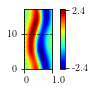

In [11]:
wbig.orbit.plot()

In [4]:
m = read_h5('C:/Users/Matt/Desktop/gudorf/KS/python/data_and_figures/tiles/defects/defect1/final_tile/RelativeOrbitKS_T15p855_L13p026.h5', directory='', basis='field')

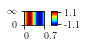

In [10]:
s.plot(fundamental_domain=False)

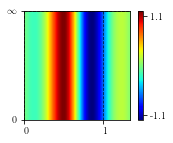

In [5]:
continued_eqv_result = dimension_continuation(rediscretize(convert_class(td[0], EquilibriumOrbitKS), new_shape=(1,32)), 12, axis=1, method='lstsq')
continued_eqv_result.orbit.plot(fundamental_domain=False, figsize=(2,2))

In [6]:
s = convert_class(rediscretize(continued_eqv_result.orbit, new_shape=(64,64)), OrbitKS)

In [7]:
w = rediscretize(converge(w,method='hybrid').orbit, new_shape=(64,64))

In [8]:
m = dimension_continuation(rediscretize(m, new_shape=(32,32)), w.T, axis=0, method='hybrid', step_size=0.1).orbit

In [9]:
m = m.reshape(64, 64)

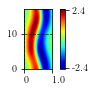

In [10]:
w.plot()

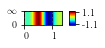

In [11]:
s.plot()

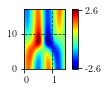

In [12]:
m.plot()

In [13]:
m = m.convert(to='field')

In [14]:
s = s.rescale(m.convert(to='field').state.max())

In [15]:
w = w.rescale(m.convert(to='field').state.max())

In [16]:
s = convert_class(s, OrbitKS)

In [17]:
mcm = convert_class(m, OrbitKS)

In [18]:
mfd = convert_class(m.change_reference_frame(to='physical'), OrbitKS)

In [19]:
w = convert_class(w, OrbitKS)

In [21]:
def pad_space(state, pad):
    return np.concatenate((np.zeros([state.shape[0], pad]), state, np.zeros([state.shape[0], pad])),axis=1)

In [22]:
sshift = s.cell_shift(axis=1)
mshift = m.cell_shift(axis=1)
wshift = w.cell_shift(axis=1)

In [23]:
sshift = s.cell_shift(axis=1)

In [28]:
s = s.reshape(64, 64).convert(to='field')
m = m.reshape(64, 64).convert(to='field')
mf = m.reshape(64, 64).change_reference_frame(to='physical').convert(to='field')
w = w.reshape(64, 64).convert(to='field')

In [33]:
mf

RelativeOrbitKS({"basis": "field", "parameters": ["17.1508", "13.0195", "-3.3126"], "field_shape": ["64", "64"]})

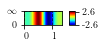

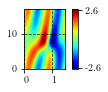

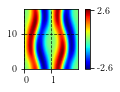

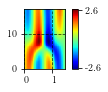

(None, None, None, None)

In [31]:
s.plot(), m.plot(fundamental_domain=False), w.plot(), mf.plot(padding=False)

In [32]:
s.to_h5('OrbitKS_streak.h5', directory='../data/tiles/unpadded/')
m.to_h5('OrbitKS_merger_comoving.h5', directory='../data/tiles/unpadded/')
mf.change_reference_frame(to='physical').convert(to='field').to_h5('OrbitKS_merger.h5', directory='../data/tiles/unpadded/')
w.to_h5('OrbitKS_wiggle.h5', directory='../data/tiles/unpadded/')

In [26]:
unpadded_s = s.convert(to='field').state
unpadded_m = m.reshape(64, 64).convert(to='field').state
unpadded_mf = m.reshape(64, 64).convert(to='field').change_reference_frame(to='physical').state
unpadded_w = w.reshape(64, 64).convert(to='field').state

In [62]:
sfinal = OrbitKS(state=s.state, basis='field', parameters=s.parameters)
mfinal = OrbitKS(state=m.state, basis='field', parameters=m.parameters)
mffinal = OrbitKS(state=mf.state, basis='field', parameters=m.parameters)
wfinal = OrbitKS(state=w.state, basis='field', parameters=w.parameters)

In [63]:
sfinal.state

array([[ 1.51788304e-17, -1.07244568e-01, -2.07555261e-01, ...,
         2.94272691e-01,  2.07555261e-01,  1.07244568e-01],
       [ 1.51788304e-17, -1.07244568e-01, -2.07555261e-01, ...,
         2.94272691e-01,  2.07555261e-01,  1.07244568e-01],
       [ 1.51788304e-17, -1.07244568e-01, -2.07555261e-01, ...,
         2.94272691e-01,  2.07555261e-01,  1.07244568e-01],
       ...,
       [ 1.51788304e-17, -1.07244568e-01, -2.07555261e-01, ...,
         2.94272691e-01,  2.07555261e-01,  1.07244568e-01],
       [ 1.51788304e-17, -1.07244568e-01, -2.07555261e-01, ...,
         2.94272691e-01,  2.07555261e-01,  1.07244568e-01],
       [ 1.51788304e-17, -1.07244568e-01, -2.07555261e-01, ...,
         2.94272691e-01,  2.07555261e-01,  1.07244568e-01]])

In [64]:
sfinal.to_h5('OrbitKS_streak.h5', directory='../data/tiles/')
mffinal.to_h5('OrbitKS_merger.h5', directory='../data/tiles/')
mfinal.to_h5('OrbitKS_merger_comoving.h5', directory='../data/tiles/')
wfinal.to_h5('OrbitKS_wiggle.h5', directory='../data/tiles/')

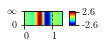

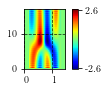

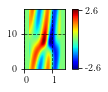

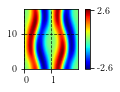

(None, None, None, None)

In [76]:
sfinal.plot(), mffinal.plot(), mfinal.plot(), wfinal.plot()

In [65]:
sfinal = OrbitKS(state=pad_space(s.reshape(64, 44).state, 10), basis='field', parameters=s.parameters)
mfinal = OrbitKS(state=pad_space(m.reshape(64, 48).state, 8), basis='field', parameters=m.parameters)
mffinal = OrbitKS(state=pad_space(m.reshape(64, 48).change_reference_frame(to='physical').state, 8), basis='field', parameters=m.parameters)
wfinal = OrbitKS(state=w.reshape(64, 64).state, basis='field', parameters=w.parameters)

In [66]:
sfinal.to_h5('OrbitKS_streak.h5', directory='../data/tiles/space_padded/')
mffinal.to_h5('OrbitKS_merger.h5', directory='../data/tiles/space_padded/')
mfinal.to_h5('OrbitKS_merger_comoving.h5', directory='../data/tiles/space_padded/')
wfinal.to_h5('OrbitKS_wiggle.h5', directory='../data/tiles/space_padded/')

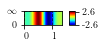

In [68]:
s.reshape(64, 44).plot()

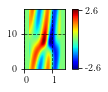

In [69]:
mfinal.plot()

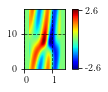

In [70]:
mfinal.plot()

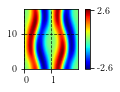

In [71]:
wfinal.plot()

In [72]:
unpadded_time_padded_space_s = s.reshape(64, 32).convert(to='field').state
unpadded_time_padded_space_m = m.reshape(64, 36).convert(to='field').state
unpadded_time_padded_space_mfd = m.reshape(64, 36).convert(to='field').change_reference_frame(to='physical').state
unpadded_time_padded_space_w = w.reshape(64, 48).convert(to='field').state

In [73]:
unpadded_time_padded_space_s = np.concatenate((np.zeros([64, 16]), unpadded_time_padded_space_s, np.zeros([64, 16])), axis=1)
unpadded_time_padded_space_m = np.concatenate((np.zeros([64, 14]), unpadded_time_padded_space_m, np.zeros([64, 14])), axis=1)
unpadded_time_padded_space_mfd = np.concatenate((np.zeros([64, 14]), unpadded_time_padded_space_mfd, np.zeros([64, 14])), axis=1)
unpadded_time_padded_space_w = np.concatenate((np.zeros([64,8]), unpadded_time_padded_space_w, np.zeros([64,8])), axis=1)

In [74]:
space_s= OrbitKS(state=unpadded_time_padded_space_s, parameters=s.parameters, basis='field')
space_m= OrbitKS(state=unpadded_time_padded_space_m, parameters=m.parameters, basis='field')
space_mf= OrbitKS(state=unpadded_time_padded_space_mfd, parameters=m.parameters, basis='field')
space_w = OrbitKS(state=unpadded_time_padded_space_w, parameters=w.parameters, basis='field')

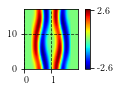

In [75]:
space_w.plot()

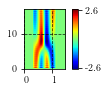

In [78]:
space_mf.plot()

In [22]:
def pad_time(state, pad):
    return np.concatenate((np.zeros([pad, state.shape[1]]), state, np.zeros([pad, state.shape[1]])),axis=0)

In [73]:
unpadded_time_padded_space_s.shape

(64, 64)

In [24]:
pad_time(unpadded_s, 8).shape

(64, 32)

In [63]:
unpadded_s = s.reshape(48, 32).convert(to='field').state
unpadded_m = m.reshape(48, 36).convert(to='field').state
unpadded_mfd = m.reshape(48, 36).convert(to='field').change_reference_frame(to='physical').state
unpadded_w = w.reshape(48, 48).convert(to='field').state

In [64]:
unpadded_s = pad_space(pad_time(unpadded_s, 8), 16)
unpadded_m = pad_space(pad_time(unpadded_m, 8), 14)
unpadded_mfd = pad_space(pad_time(unpadded_mfd, 8), 14)
unpadded_w = pad_space(pad_time(unpadded_w, 8), 8)

In [65]:
unpadded_s_orbit= OrbitKS(state=unpadded_s, basis='field', parameters=s.parameters)
unpadded_m_orbit= OrbitKS(state=unpadded_m, basis='field', parameters=m.parameters)
unpadded_w_orbit = OrbitKS(state=unpadded_w, basis='field', parameters=w.parameters)
unpadded_mfd_orbit = OrbitKS(state=unpadded_mfd, basis='field', parameters=m.parameters)

In [66]:
unpadded_s_orbit,unpadded_m_orbit,unpadded_w_orbit,unpadded_mfd_orbit

(OrbitKS({"basis": "field", "parameters": ["0.0", "12.0", "0"], "field_shape": ["64", "64"]}),
 OrbitKS({"basis": "field", "parameters": ["17.1508", "13.0195", "0"], "field_shape": ["64", "64"]}),
 OrbitKS({"basis": "field", "parameters": ["17.1508", "17.5911", "0"], "field_shape": ["64", "64"]}),
 OrbitKS({"basis": "field", "parameters": ["17.1508", "13.0195", "0"], "field_shape": ["64", "64"]}))

In [71]:
unpadded_s_orbit.to_h5('OrbitKS_streak.h5', directory='../data/tiles/padded/')
unpadded_mfd_orbit.to_h5('OrbitKS_merger.h5', directory='../data/tiles/padded/')
unpadded_m_orbit.to_h5('OrbitKS_merger_comoving.h5', directory='../data/tiles/padded/')
unpadded_w_orbit.to_h5('OrbitKS_wiggle.h5', directory='../data/tiles/padded/')

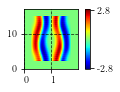

In [75]:
unpadded_w_orbit.plot()

In [67]:
48 * (m.L / w.L)

35.52574643606683

In [66]:
48 * (s.L / w.L)

32.74389455975643

In [58]:
unpadded_s.shape

(64, 44)

In [51]:
unpadded_m.shape

(64, 48)

In [ ]:
padded_s = 

In [37]:
s.L

12.0

43.658526079675234

In [38]:
w.L

17.59106568550729

In [41]:
64 * (mcm.L / w.L)

47.36766191475578

In [60]:
fn = 'C:/Users/Matt/Desktop/gudorf/KS/python/data_and_figures/tiles/defects/defect1/final_tile/RelativeOrbitKS_T15p855_L13p026.h5'

In [68]:
merger = read_h5('RelativeOrbitKS_T17p146_L13p019.h5', directory='../data/tiles/', basis='field', check=True)

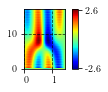

In [32]:
td[1].plot()

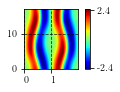

In [33]:
td[2].plot()

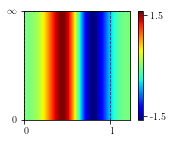

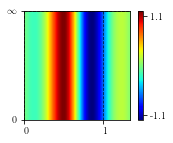

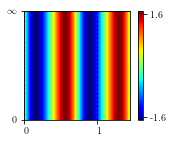

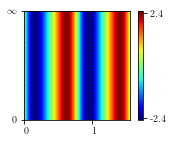

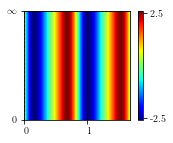

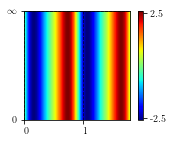

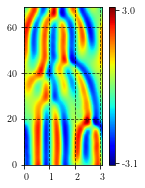

In [7]:
orbit_ = read_h5('RelativeOrbitKS_L27p526_T68p730.h5', state_type='field')
orbit_.plot(fundamental_domain=True)

In [3]:
orbit_

RelativeOrbitKS({"basis": "modes", "parameters": ["68.7305", "27.5266", "-21.8068"], "field_shape": ["32", "32"]})

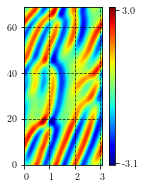

In [3]:
orbit_.rotate(10, axis=1).plot(fundamental_domain=False)

In [8]:
orbit_.residual()

1.190665906758718e-24

In [3]:
orbit_.frame

'comoving'

In [4]:
calculate_spatial_shift(orbit_.change_reference_frame(to='physical').convert(to='s_modes').state, orbit_.L)

5.147560224560359

In [23]:
orbit_.S = -orbit_.S

In [24]:
calculate_spatial_shift(orbit_.change_reference_frame(to='physical').convert(to='s_modes').state, orbit_.L)

5.147560224560359

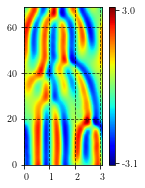

In [25]:
orbit_.plot()

In [ ]:
# 

In [4]:
continuation_endpoint = dimension_continuation(orbit_, orbit_.T + 5, step_size=0.1, method='lstsq', axis=0, verbose=True)

Starting lstsq. Initial residual=1.9923788363619807e-05, target=1.024e-06
200
Converged. exiting with residual 2.1473529812116915e-08
Starting lstsq. Initial residual=1.987115731080974e-05, target=1.024e-06
0
Converged. exiting with residual 2.1432634793134153e-08
Starting lstsq. Initial residual=1.9734706671552345e-05, target=1.024e-06
0
Converged. exiting with residual 2.5918662263775963e-08
Starting lstsq. Initial residual=1.9721302597663008e-05, target=1.024e-06
0
Converged. exiting with residual 3.24833729673905e-08
Starting lstsq. Initial residual=1.9699142807230734e-05, target=1.024e-06
0
Converged. exiting with residual 3.966591478472442e-08
Starting lstsq. Initial residual=1.967624862963045e-05, target=1.024e-06
0
Converged. exiting with residual 4.729940954103234e-08
Starting lstsq. Initial residual=1.965243087187663e-05, target=1.024e-06
0
Converged. exiting with residual 5.509719343617101e-08
Starting lstsq. Initial residual=1.9627794747728616e-05, target=1.024e-06
0
Conver

In [5]:
continuation_endpoint.orbit.T

69.73052013139898

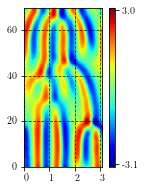

In [6]:
continuation_endpoint.orbit.plot()

In [7]:
disc_continuation_endpoint = discretization_continuation(orbit_, (orbit_.N+2, orbit_.M+2), method='lstsq', axis=0, verbose=True)

Starting lstsq. Initial residual=6.856670435282005, target=1.088e-06
00000
Converged. exiting with residual 6.526346543816863e-07
Starting lstsq. Initial residual=0.42626290131707095, target=1.156e-06
0
Converged. exiting with residual 2.3485156067894897e-11


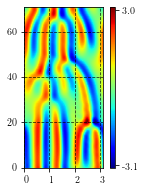

In [8]:
disc_continuation_endpoint.orbit.plot()

In [9]:
disc_continuation_endpoint.orbit

RelativeOrbitKS({"state_type": "modes", "frame": "comoving", "T": "7.06e+01", "L": "2.77e+01", "S": "-2.2e+01", "N": "34", "M": "34"})